In [18]:
Задача 1. Минимизация гладкой функции
Рассмотрим функцию: f(x) = sin(x / 5) exp(x / 10) + 5 exp(-x / 2) на промежутке [1, 30]
Постройте график функции.
Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
Запишите выводы.
Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно.
Выведите полученное значение функции в точке минимума с точностью до 2 знака после запятой.
Измените начальное приближение на x=30. Выведите значение функции в точке минимума  с точностью до 2 знака после запятой.



SyntaxError: invalid character '–' (U+2013) (555056434.py, line 6)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

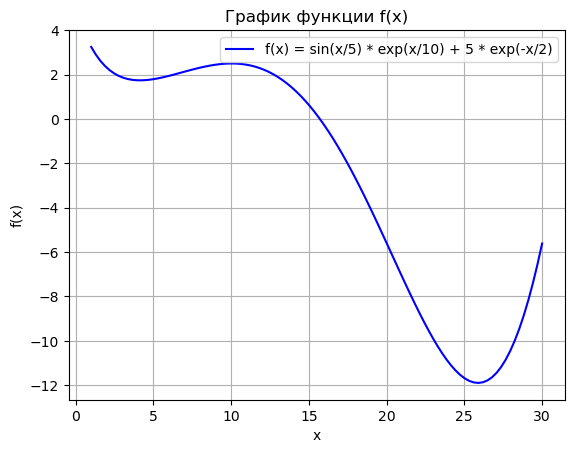

In [24]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
# график    
x = np.linspace(1, 30, 100)
y = f(x)
plt.plot(x, y, color='blue', label='f(x) = sin(x/5) * exp(x/10) + 5 * exp(-x/2)')
plt.title('График функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


In [26]:
# минимум с разными начальными приближениями
initial_guesses = [2, 15, 30]
for x0 in initial_guesses:
    result = minimize(f, x0=x0)
    print(f"начальное приближение x0 = {x0}")
    print(f"найденный минимум: x = {result.x[0]:.2f}, f(x) = {result.fun:.2f}")
    print(f"успех: {result.success}, количество итераций: {result.nit}")
    print("-" * 30)

начальное приближение x0 = 2
найденный минимум: x = 4.14, f(x) = 1.75
успех: True, количество итераций: 6
------------------------------
начальное приближение x0 = 15
найденный минимум: x = 24.68, f(x) = -11.50
успех: False, количество итераций: 1
------------------------------
начальное приближение x0 = 30
найденный минимум: x = 25.88, f(x) = -11.90
успех: True, количество итераций: 6
------------------------------


In [28]:
# минимизация с BFGS x0 = 2
result_bfgs_x2 = minimize(f, x0=2, method='BFGS')
x_min_x2 = result_bfgs_x2.x[0]
f_min_x2 = result_bfgs_x2.fun
print(f"метод BFGS, начальное приближение x0 = 2")
print(f"точка минимума: x = {x_min_x2:.2f}")
print(f"значение функции в точке минимума: {f_min_x2:.2f}")

метод BFGS, начальное приближение x0 = 2
точка минимума: x = 4.14
значение функции в точке минимума: 1.75


In [30]:
# минимизация с BFGS, x0 = 30
result_bfgs_x30 = minimize(f, x0=30, method='BFGS')
x_min_x30 = result_bfgs_x30.x[0]
f_min_x30 = result_bfgs_x30.fun
print(f"метод BFGS, начальное приближение x0 = 30")
print(f"точка минимума: x = {x_min_x30:.2f}")
print(f"значение функции в точке минимума: {f_min_x30:.2f}")

Метод BFGS, начальное приближение x0 = 30
Точка минимума: x = 25.88
Значение функции в точке минимума: -11.90


In [ ]:
Задача 2. Глобальная оптимизация
Попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
Изучите документацию по использованию функции scipy.optimize.differential_evolution.
Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума запишите с точностью до второго знака после запятой. 
Сделайте вывод.
Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. 

In [32]:
from scipy.optimize import differential_evolution, minimize


In [34]:
# определяем функцию из предыдущей задачи
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

bounds = [(1, 30)]  # границы как список кортежей
result_de = differential_evolution(f, bounds)

f_min_de = result_de.fun
x_min_de = result_de.x[0]
nit_de = result_de.nit  # количество итераций

print(f"дифференциальная эволюция: x = {x_min_de:.2f}, f(x) = {f_min_de:.2f}")
print(f"количество итераций: {nit_de}")


дифференциальная эволюция: x = 25.88, f(x) = -11.90
количество итераций: 5


In [36]:
# сравнение BFGS с хорошим начальным приближением x0=30 (из прошлого задания)
result_bfgs = minimize(f, x0=30, method='BFGS')
nit_bfgs = result_bfgs.nit  
f_min_bfgs = result_bfgs.fun
x_min_bfgs = result_bfgs.x[0]

print(f"BFGS (x0=30): x = {x_min_bfgs:.2f}, f(x) = {f_min_bfgs:.2f}")
print(f"количество итераций: {nit_bfgs}")

BFGS (x0=30): x = 25.88, f(x) = -11.90
количество итераций: 6


In [38]:
Задача 3. Минимизация негладкой функции
1. Теперь рассмотрим функцию h(x) = int(f(x)) на отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
3. Найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Запишите ответ.
4. Найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Запишите ответ.
5. Сделайте выводы о применении методов минимизации.

SyntaxError: invalid syntax (3704751777.py, line 1)

In [40]:
# определяем функции
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def h(x):
    return int(f(x))

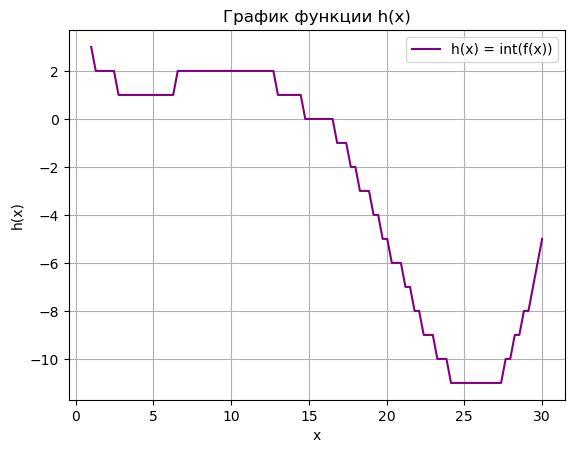

In [42]:
# строим график h(x)
x = np.linspace(1, 30, 100)
h_vec = np.vectorize(h)
y = h_vec(x)
plt.plot(x, y, color='purple', label='h(x) = int(f(x))')
plt.title('График функции h(x)')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
# минимизация h(x) с BFGS, x0 = 30
result_bfgs = minimize(h, x0=30, method='BFGS')
x_min_bfgs = result_bfgs.x[0]
h_min_bfgs = result_bfgs.fun
print(f"BFGS, начальное приближение x0 = 30")
print(f"точка минимума: x = {x_min_bfgs:.2f}")
print(f"значение функции h(x) = {h_min_bfgs:.2f}")


BFGS, начальное приближение x0 = 30
точка минимума: x = 30.00
значение функции h(x) = -5.00


C:\Users\dimam\AppData\Local\Temp\ipykernel_12092\3176376502.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(f(x))


In [48]:
# минимизация h(x) с дифференциальной эволюцией
bounds = [(1, 30)]
result_de = differential_evolution(h, bounds)
x_min_de = result_de.x[0]
h_min_de = result_de.fun
print(f"дифференциальная эволюция")
print(f"точка минимума: x = {x_min_de:.2f}")
print(f"значение функции h(x) = {h_min_de:.2f}")

дифференциальная эволюция
точка минимума: x = 24.12
значение функции h(x) = -11.00


C:\Users\dimam\AppData\Local\Temp\ipykernel_12092\3176376502.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(f(x))
